<a href="https://colab.research.google.com/github/Karthik70904/Internal-Plagiarism-Analyser/blob/main/Internal_Plagiarism_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Upload documents (.docx) format more than 1 is required**

In [ ]:
# @title **Add Files**
!rm -rf /content/sample_data/*
!mkdir /content/sample_data/files
from google.colab import files
import shutil

uploaded = files.upload()

for filename in uploaded.keys():
  shutil.move(filename, 'sample_data/files/' + filename)

Saving Animation.docx to Animation.docx
Saving Chemical.docx to Chemical.docx
Saving Gaming.docx to Gaming.docx
Saving Nano-Tech.docx to Nano-Tech.docx
Saving Spac-Tech.docx to Spac-Tech.docx


#**Pre-Processing**

In [ ]:
# @title ***checking the Files***
!pip install -q docx2txt
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import docx2txt

# Import the docx2txt library to extract text from docx files

# Specify the directory containing the .txt files
directory_path = '/content/sample_data/files/'  # Replace with the actual directory path

student_files = [doc for doc in os.listdir(directory_path) if doc.endswith('.docx')]
student_notes = [docx2txt.process(os.path.join(directory_path, _file))
                 for _file in student_files] # Use docx2txt to read docx files

# Check if any files were loaded
if not student_files:
    print("No .docx files found in the directory.")
else:
    # Customize TfidfVectorizer to potentially include more words in vocabulary
    def vectorize(Text):
        vectorizer = TfidfVectorizer()
        return vectorizer.fit_transform(Text).toarray()

    def similarity(doc1, doc2):
        return cosine_similarity([doc1, doc2])


    vectors = vectorize(student_notes)
    s_vectors = list(zip(student_files, vectors))
    plagiarism_results = set()


    def check_plagiarism():
        global s_vectors
        for student_a, text_vector_a in s_vectors:
            new_vectors = s_vectors.copy()
            current_index = new_vectors.index((student_a, text_vector_a))
            del new_vectors[current_index]
            for student_b, text_vector_b in new_vectors:
                sim_score = similarity(text_vector_a, text_vector_b)[0][1]
                student_pair = sorted((student_a, student_b))
                score = (student_pair[0], student_pair[1], sim_score)
                plagiarism_results.add(score)
        return plagiarism_results


    for data in check_plagiarism():
        print(data)

('Gaming.docx', 'Nano-Tech.docx', 0.46706175770732056)
('Chemical.docx', 'Nano-Tech.docx', 0.48779792065770533)
('Gaming.docx', 'Spac-Tech.docx', 0.4125497673113446)
('Animation.docx', 'Spac-Tech.docx', 0.4177152259590282)
('Nano-Tech.docx', 'Spac-Tech.docx', 0.4793674237225164)
('Animation.docx', 'Chemical.docx', 0.3986708355307733)
('Chemical.docx', 'Spac-Tech.docx', 0.49346163131107845)
('Animation.docx', 'Nano-Tech.docx', 0.45654692865655555)
('Animation.docx', 'Gaming.docx', 0.4020198738005815)
('Chemical.docx', 'Gaming.docx', 0.4249511708741286)


In [ ]:
# @title **Display's plagiarism data percentage**

from google.colab import files
import shutil
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import docx2txt # Import the docx2txt library to extract text from docx files
import csv

# Make sure this line is not indented
for data in check_plagiarism():

    # Write plagiarism results to a CSV file
    with open('/content/sample_data/plagiarism_results.csv', 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['File 1', 'File 2', 'Similarity Score'])
        for student_a, student_b, sim_score in plagiarism_results:
            csv_writer.writerow([student_a, student_b, sim_score])

In [ ]:
# @title **Resultant Data**

import pandas as pd

df = pd.read_csv('/content/sample_data/plagiarism_results.csv')
df

,File 1,File 2,Similarity Score
0,Gaming.docx,Nano-Tech.docx,0.467062
1,Chemical.docx,Nano-Tech.docx,0.487798
2,Gaming.docx,Spac-Tech.docx,0.412550
3,Animation.docx,Spac-Tech.docx,0.417715
4,Nano-Tech.docx,Spac-Tech.docx,0.479367
5,Animation.docx,Chemical.docx,0.398671
6,Chemical.docx,Spac-Tech.docx,0.493462
7,Animation.docx,Nano-Tech.docx,0.456547
8,Animation.docx,Gaming.docx,0.402020
9,Chemical.docx,Gaming.docx,0.424951


#**Final Output**

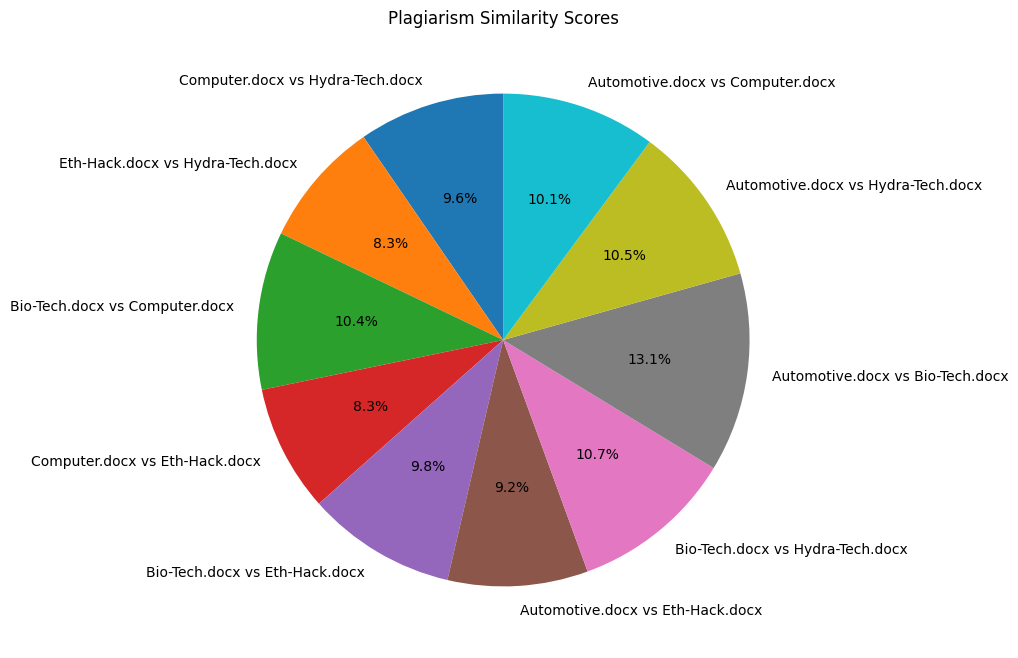

In [ ]:
# @title #**Pichart**

import matplotlib.pyplot as plt

# Assuming 'plagiarism_results' is a set of tuples like: (student1, student2, similarity_score)
data = list(plagiarism_results)
student_pairs = [f"{d[0]} vs {d[1]}" for d in data]
similarity_scores = [d[2] for d in data]

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(similarity_scores, labels=student_pairs, autopct='%1.1f%%', startangle=90)
plt.title('Plagiarism Similarity Scores')
plt.show()

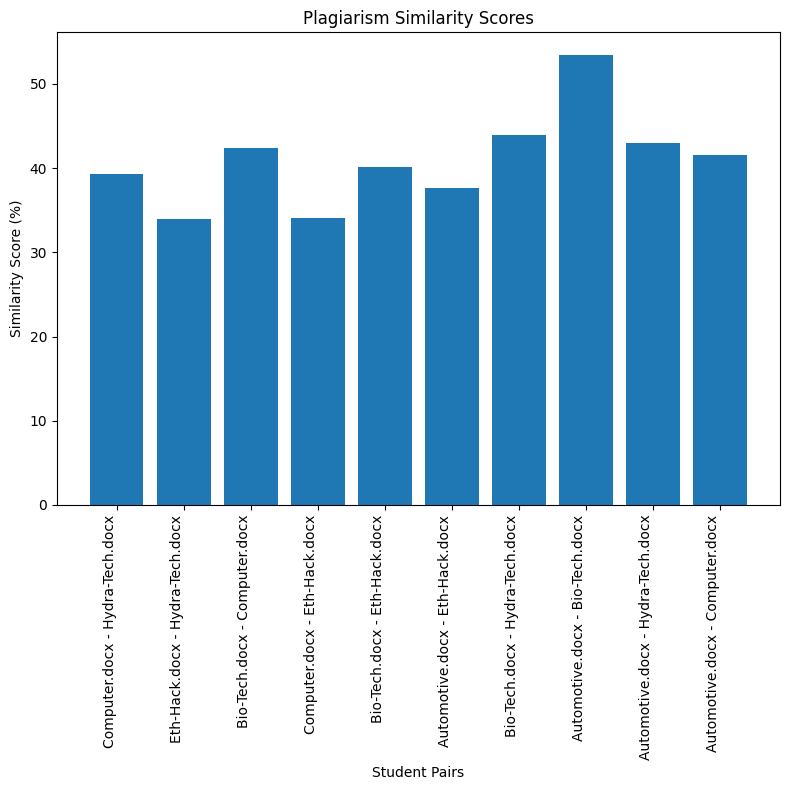

In [ ]:
# @title #**Percentage Graph**

import matplotlib.pyplot as plt

# Extract data for plotting
student_pairs = [f"{data[0]} - {data[1]}" for data in plagiarism_results]
similarity_scores = [data[2] * 100 for data in plagiarism_results]  # Convert to percentages

# Create a bar chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.bar(student_pairs, similarity_scores)
plt.xlabel("Student Pairs")
plt.ylabel("Similarity Score (%)")
plt.title("Plagiarism Similarity Scores")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

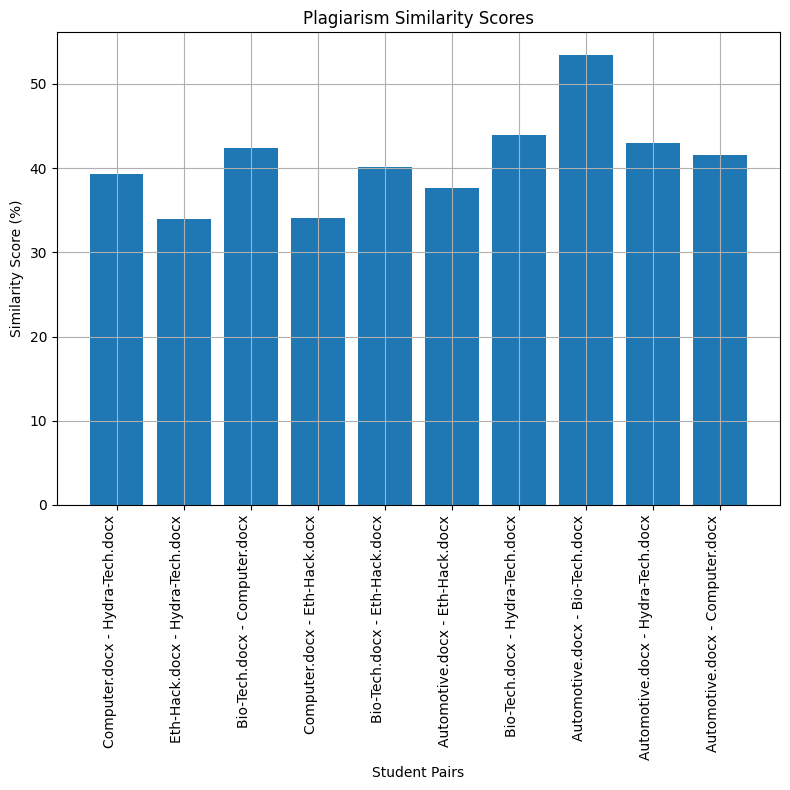

In [ ]:
# @title #**Bar Graph**

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.bar(student_pairs, similarity_scores)
plt.xlabel("Student Pairs")
plt.ylabel("Similarity Score (%)")
plt.title("Plagiarism Similarity Scores")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)  # Add grid to the bar chart
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

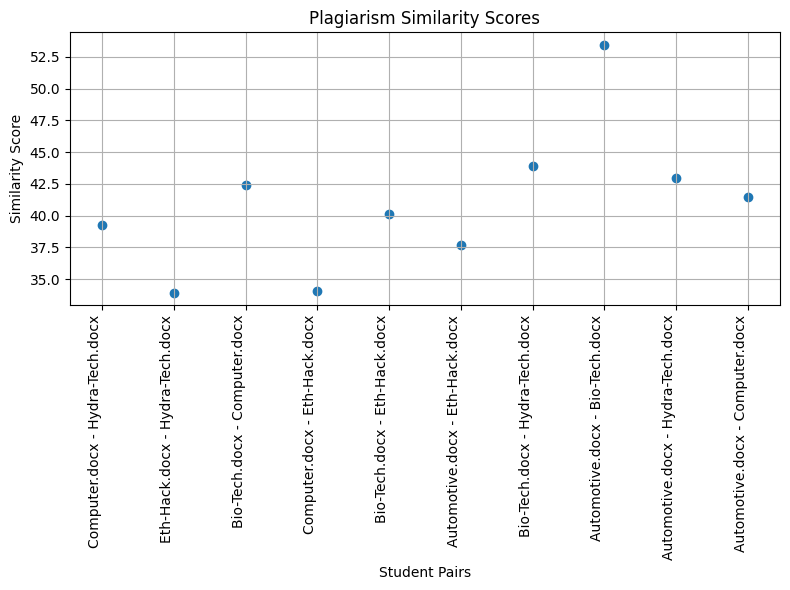

In [ ]:
# @title #**scatter plot**

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(student_pairs, similarity_scores)
plt.xlabel("Student Pairs")
plt.ylabel("Similarity Score")
plt.title("Plagiarism Similarity Scores")
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for readability
plt.grid(True)  # Add grid to the scatter plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()